In [5]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
from datetime import datetime as dt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

#### Pre-requisites data manipulation steps in the "uk_location_processed.csv" file.
1. Map AddressInfo.Town name with AddressInfo.Postcode according to the UK postcode list
https://ideal-postcodes.co.uk/guides/postcode-areas
2. Correct postcode format in some records.
3. Update those records with capital letters in AddressInfo.Town to be smaller letters.
2. Filter out records from the countries which are not part of the UK ie, Isle of Man, Ireland and Channel Islands.
3. Filter out records with imcomplete coordinates. 

In [138]:
df = pd.read_csv("uk_location_processed.csv")
df.head()

,con-ID,con-ConnectionTypeID,con-StatusTypeID,con-LevelID,con-Amps,con-Voltage,con-PowerKW,con-CurrentTypeID,con-Quantity,ID,...,StatusTypeID,NumberOfPoints,UsageTypeID,AddressInfo.Title,AddressInfo.Town,AddressInfo.AddressLine1,AddressInfo.StateOrProvince,AddressInfo.Postcode,AddressInfo.Latitude,AddressInfo.Longitude
0,206268,Type 2 (Socket Only),Operational,2.0,32.0,230.0,7.0,AC (Single-Phase),4.0,148539,...,50.0,4.0,4.0,Tesco Superstore-Braintree Great Notley,Chelmsford,1 the Square,Braintree,CM77 7WW,51.857605,0.521807
1,191829,Type 2 (Socket Only),Unknown,2.0,32.0,400.0,22.0,AC (Three-Phase),NaN,137034,...,0.0,NaN,1.0,"University of St Andrews, Bute Building Annex",Kirkcaldy,Queens Terrace,NaN,KY16 9TS,56.338011,-2.793738
2,191830,Type 2 (Socket Only),Unknown,2.0,32.0,400.0,22.0,AC (Three-Phase),NaN,137034,...,0.0,NaN,1.0,"University of St Andrews, Bute Building Annex",Kirkcaldy,Queens Terrace,NaN,KY16 9TS,56.338011,-2.793738
3,34678,Type 2 (Socket Only),Operational,2.0,32.0,230.0,7.0,AC (Single-Phase),2.0,19652,...,50.0,2.0,4.0,Asda Ferring Superstore,Brighton,Littlehampton Rd,West Sussex,BN12 6PN,50.818059,-0.458707
4,51489,BS1363 3 Pin 13 Amp,Operational,2.0,13.0,230.0,3.0,AC (Single-Phase),2.0,19652,...,50.0,2.0,4.0,Asda Ferring Superstore,Brighton,Littlehampton Rd,West Sussex,BN12 6PN,50.818059,-0.458707


In [139]:
df.shape

(20666, 22)

In [198]:
## There are columns with null values which is ok since we will not be focusing on those information.
df.isnull().sum()

con-ID                             0
con-ConnectionTypeID               0
con-StatusTypeID                  58
con-LevelID                       65
con-Amps                        4750
con-Voltage                     4482
con-PowerKW                      132
con-CurrentTypeID                225
con-Quantity                    4234
ID                                 0
UsageCost                       6213
OperatorID                       516
StatusTypeID                      26
NumberOfPoints                  4882
UsageTypeID                       14
AddressInfo.Title                 10
AddressInfo.Town                   1
AddressInfo.AddressLine1         328
AddressInfo.StateOrProvince    11775
AddressInfo.Postcode              79
AddressInfo.Latitude               0
AddressInfo.Longitude              0
dtype: int64

In [141]:
df1 = df.drop(['con-ID', 'con-LevelID','OperatorID'], axis=1)

In [142]:
df1.describe()

,con-Amps,con-Voltage,con-PowerKW,con-Quantity,ID,StatusTypeID,NumberOfPoints,UsageTypeID,AddressInfo.Latitude,AddressInfo.Longitude
count,15916.000000,16184.000000,20534.000000,16432.000000,20666.000000,20640.000000,15784.000000,20652.000000,20666.000000,20666.000000
mean,45.964690,305.073838,25.372678,1.925755,111782.680393,41.184109,2.584833,4.003728,52.706575,-1.556812
std,44.143104,122.576031,29.259609,2.293155,53414.960116,24.271657,3.155884,1.345909,1.755624,1.629930
min,0.000000,2.000000,0.000000,-2.000000,4121.000000,0.000000,-4.000000,0.000000,49.200249,-9.049076
25%,32.000000,230.000000,7.000000,1.000000,70658.000000,50.000000,1.000000,4.000000,51.479236,-2.584041
50%,32.000000,230.000000,7.000000,1.000000,125405.000000,50.000000,2.000000,4.000000,51.947388,-1.312956
75%,32.000000,400.000000,50.000000,2.000000,157745.000000,50.000000,3.000000,5.000000,53.609875,-0.200133
max,500.000000,1000.000000,600.000000,100.000000,192948.000000,210.000000,100.000000,7.000000,60.759189,4.156398


In [143]:
location_name = df1['AddressInfo.Town'].unique()
location_name
with np.printoptions(threshold=np.inf):
     print(location_name)

['Chelmsford' 'Kirkcaldy' 'Brighton' 'Coventry' 'London' 'Inverness'
 'Slough' 'Sunderland' 'Blackburn' 'Guildford' 'Dumfries' 'Norwich'
 'Milton Keynes' 'Oldham' 'Oxford' 'Doncaster' 'Perth' 'Birmingham'
 'Newcastle upon Tyne' 'Southampton' 'Nottingham' 'Kilmarnock' 'Sheffield'
 'Teesside' 'Kingston upon Thames' 'Dudley' 'Harrow' 'Leicester'
 'Hemel Hempstead' 'Walsall' 'Hebrides' 'Peterborough' 'Wigan'
 'Galashiels' 'Bristol' 'Hereford' 'Dartford' 'Derby' 'Enfield'
 'Southend-on-Sea' 'Portsmouth' 'Worcester' 'Tunbridge Wells' 'Aberdeen'
 'Bradford' 'Plymouth' 'Sutton' 'Huddersfield ' 'Dorchester' 'Northampton'
 'Twickenham' 'Gloucester' 'Wolverhampton' 'Edinburgh' 'Belfast' 'Swindon'
 'Llandrindod Wells' 'Wakefeild' 'Swansea' 'Glasgow' 'Truro' 'Stevenage'
 'Manchester' 'Cardiff' 'Kirkwall' 'Telford' 'Redhill' 'Stoke-on-Trent'
 'Reading' 'Luton' 'York' 'Falkirk' 'Lancaster' 'Canterbury' 'Llandudno'
 'Cambridge' 'Lincoln' 'Ipswich' 'Lerwick' 'Shrewsbury' 'Preston' 'Bath'
 'Newport' 'To

In [144]:
locations = pd.DataFrame(df1.groupby(['ID','AddressInfo.Town']).size())
locations = locations .reset_index()

In [145]:
locations

,ID,AddressInfo.Town,0
0,4121,Aberdeen,2
1,4123,Edinburgh,2
2,4124,Belfast,2
3,4125,Preston,2
4,4126,Halifax,2
...,...,...,...
12375,192933,Stevenage,2
12376,192934,Bournemouth,2
12377,192937,Stoke-on-Trent,3
12378,192938,Stoke-on-Trent,4


In [146]:
locations.columns = ['ID','AddressInfo.Town', 'Number of Connections']

In [150]:
locations['AddressInfo.Town'].value_counts()

London                 2492
Coventry                306
Newcastle upon Tyne     264
Twickenham              258
Belfast                 244
                       ... 
Harrogate                17
Galway                    2
Southport                 1
Blackheath                1
Jersey                    1
Name: AddressInfo.Town, Length: 118, dtype: int64

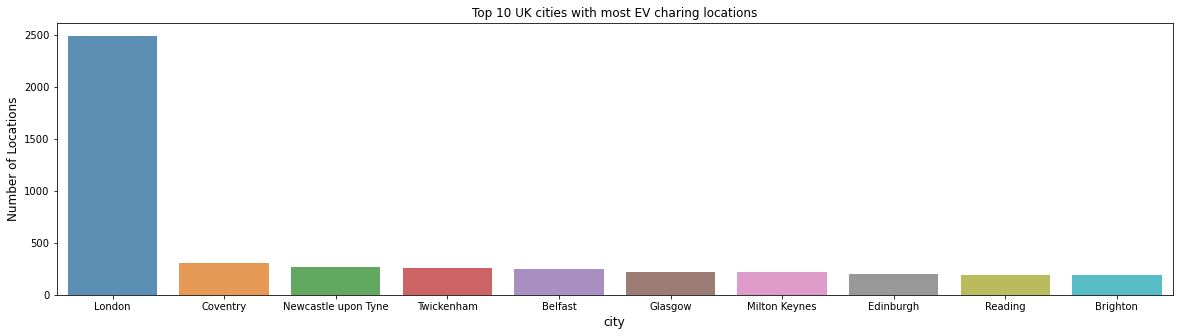

In [132]:
loc_count = locations['AddressInfo.Town'].value_counts()
loc_count = loc_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(loc_count.index, loc_count.values, alpha=0.8)
plt.title('Top 10 UK cities with most EV charing locations')
plt.ylabel('Number of Locations', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [168]:
ten_least = loc_count.nsmallest(10)
ten_least

Southport      1
Blackheath     1
Jersey         1
Galway         2
Harrogate     17
Halifax       18
Telford       23
Lerwick       23
Blackpool     24
Hebrides      26
Name: AddressInfo.Town, dtype: int64

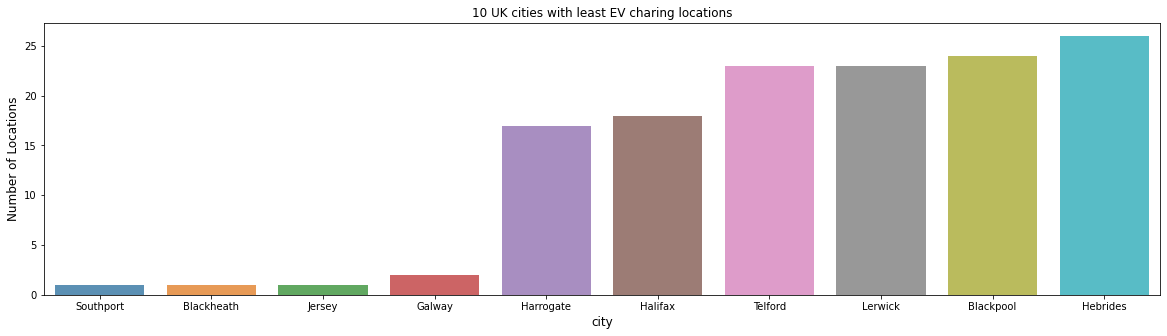

In [225]:
plt.figure(figsize=(20,5))
sns.barplot(ten_least.index, ten_least.values, alpha=0.8)
plt.title('10 UK cities with least EV charing locations')
plt.ylabel('Number of Locations', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [226]:
## The number of each EV charging plug types in the UK.
plugType = df1.groupby(['con-ConnectionTypeID']).size()
plugType

con-ConnectionTypeID
BS1363 3 Pin 13 Amp              915
Blue Commando (2P+E)              99
CCS (Type 2)                    2682
CEE 3 Pin                          3
CEE 5 Pin                         10
CHAdeMO                         2782
IEC 60309 5-pin                    2
NEMA 6-20                          1
Tesla (Model S/X)                557
Tesla (Roadster)                  10
Tesla Supercharger                81
Type 1 (J1772)                   793
Type 2 (Socket Only)           11030
Type 2 (Tethered Connector)     1675
Unknown                           26
dtype: int64

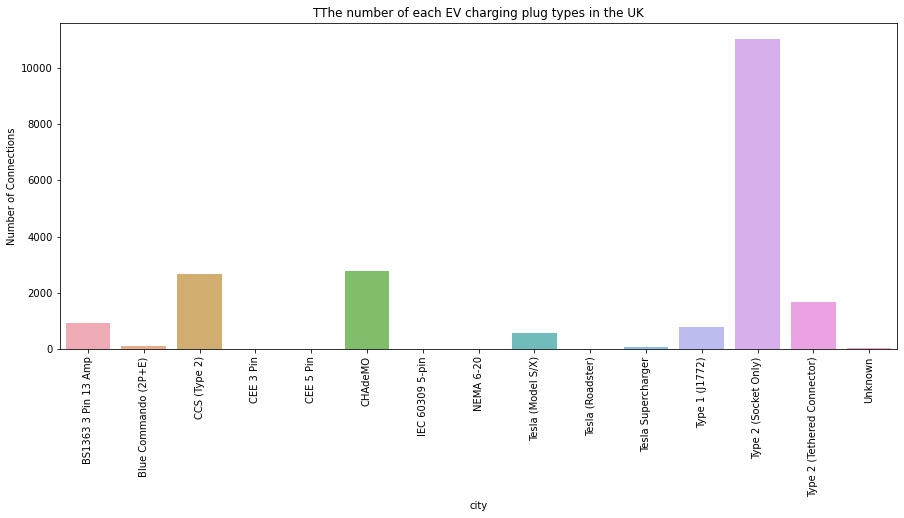

In [227]:
plt.figure(figsize=(15,6))
sns.barplot(plugType.index, plugType.values, alpha=0.8)
plt.title('TThe number of each EV charging plug types in the UK')
plt.xticks(rotation=90)
plt.ylabel('Number of Connections', fontsize=10)
plt.xlabel('city', fontsize=10)
plt.show()

In [184]:
## EV charging connection types in the UK.
currentType = df1['con-CurrentTypeID'].value_counts()
currentType

AC (Single-Phase)    10164
DC                    5667
AC (Three-Phase)      4610
Name: con-CurrentTypeID, dtype: int64

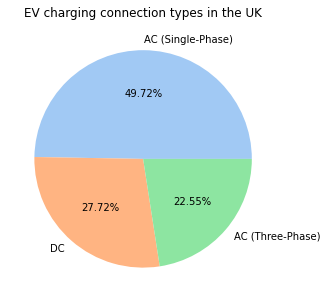

In [228]:
plt.figure(figsize=(20,5))
labels = ['AC (Single-Phase)', 'DC', 'AC (Three-Phase)']
colors = sns.color_palette('pastel')[0:5]
plt.pie(currentType,labels = labels, colors = colors,autopct="%.2f%%")
plt.title('EV charging connection types in the UK')
plt.show()

## London data

In [192]:
london = pd.DataFrame(df1.loc[(df1["AddressInfo.Town"] == 'London')])
london.head(3)

,con-ConnectionTypeID,con-StatusTypeID,con-Amps,con-Voltage,con-PowerKW,con-CurrentTypeID,con-Quantity,ID,UsageCost,StatusTypeID,NumberOfPoints,UsageTypeID,AddressInfo.Title,AddressInfo.Town,AddressInfo.AddressLine1,AddressInfo.StateOrProvince,AddressInfo.Postcode,AddressInfo.Latitude,AddressInfo.Longitude
6,Type 2 (Socket Only),Operational,32.0,230.0,7.0,AC (Single-Phase),2.0,101805,Inclusive; for Polar Plus subscription members...,50.0,2.0,4.0,Aldermans Hill,London,Aldermans Hill,London,N13 4PN,51.618561,-0.111586
30,Type 2 (Socket Only),Operational,16.0,230.0,3.7,AC (Single-Phase),NaN,173393,NaN,0.0,NaN,1.0,38 King Henry's Road,London,38 King Henry's Road,NaN,NW3 3RP,51.542602,-0.159085
32,CCS (Type 2),Operational,NaN,NaN,50.0,DC,1.0,99704,£0.108/kWh; for Polar Plus subscription member...,50.0,1.0,4.0,376 Hendon Way,London,376 Hendon Way,NaN,NW4 3LP,51.581303,-0.226801


In [229]:
## The number of each EV charging plug types in London.
plugType_london = london.groupby(['con-ConnectionTypeID']).size()
plugType_london

con-ConnectionTypeID
BS1363 3 Pin 13 Amp             118
Blue Commando (2P+E)              2
CCS (Type 2)                    164
CEE 5 Pin                         1
CHAdeMO                         195
Tesla (Model S/X)                19
Tesla (Roadster)                  2
Tesla Supercharger                7
Type 1 (J1772)                  613
Type 2 (Socket Only)           2538
Type 2 (Tethered Connector)     138
Unknown                           3
dtype: int64

In [230]:
## EV charging connection types in London.
currentType_london = london['con-CurrentTypeID'].value_counts()
currentType_london

AC (Single-Phase)    3088
DC                    385
AC (Three-Phase)      310
Name: con-CurrentTypeID, dtype: int64

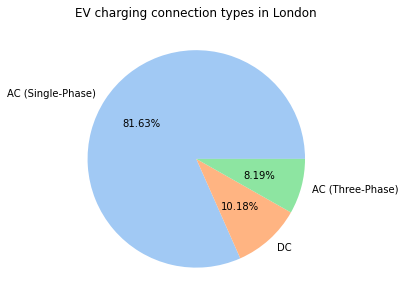

In [231]:
plt.figure(figsize=(20,5))
labels = ['AC (Single-Phase)', 'DC', 'AC (Three-Phase)']
colors = sns.color_palette('pastel')[0:5]
plt.pie(currentType_london,labels = labels, colors = colors,autopct="%.2f%%")
plt.title('EV charging connection types in London')
plt.show()

In [232]:
#How many EV connection points in London are operational.
statusType_london = london['con-StatusTypeID'].value_counts()
statusType_london

Operational                   3676
Not Operational                 47
Planned For Future Date         28
Unknown                         19
Partly Operational (Mixed)      18
Removed (Decommissioned)         2
Name: con-StatusTypeID, dtype: int64